In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
def get_loss(w1, w2):
    # cf. http://www.sfu.ca/~ssurjano/camel6.html
    term = (4 - 2.1 * w1**2 + w1**4 / 3) * w1**2
    return term + w1 * w2 + (-4 + 4 * w2**2) * w2**2

w1 = np.linspace(-2, 2, 101)
w2 = np.linspace(-1, 1, 101)
W1, W2 = np.meshgrid(w1, w2)
loss = get_loss(W1, W2)

Text(0.5, 0, 'loss')

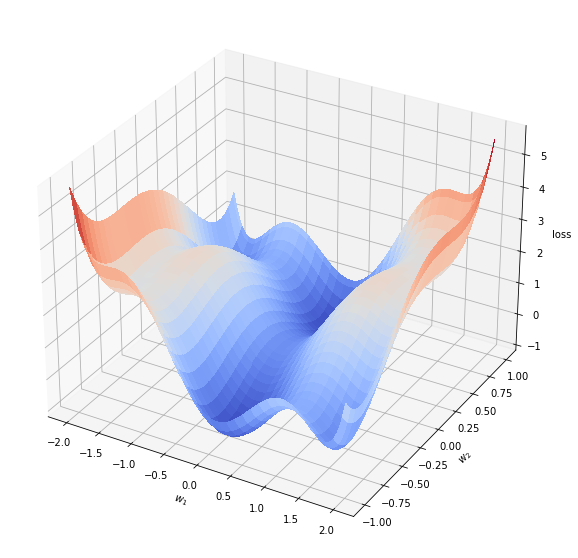

In [3]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
ax.plot_surface(W1, W2, loss, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
ax.set_zlabel('loss')

Text(0, 0.5, '$w_2$')

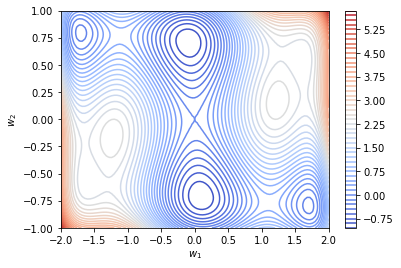

In [4]:
plt.contour(W1, W2, loss, 50, cmap='coolwarm')
plt.colorbar()
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')

In [5]:
def iterate(w1_init, w2_init, alpha, n):
    w1 = torch.tensor(w1_init, requires_grad=True)
    w2 = torch.tensor(w2_init, requires_grad=True)
    w1_history = [w1_init]
    w2_history = [w2_init]
    for _ in range(n):
        loss = get_loss(w1, w2)
        loss.backward()
        with torch.no_grad():
            w1 -= alpha * w1.grad
            w2 -= alpha * w2.grad
            w1.grad.zero_()
            w2.grad.zero_()
        w1_history.append(w1.item())
        w2_history.append(w2.item())
    return w1_history, w2_history

In [6]:
def plot_iterations(w1_history, w2_history, skip=1):
    plt.contour(W1, W2, loss, 50, cmap='coolwarm')
    plt.plot(w1_history[::skip], w2_history[::skip], 'kx-')
    plt.colorbar()
    plt.xlabel('$w_1$')
    plt.ylabel('$w_2$')

## $w_1$, $w_2$ の初期値によっては異なる最小点に到達する

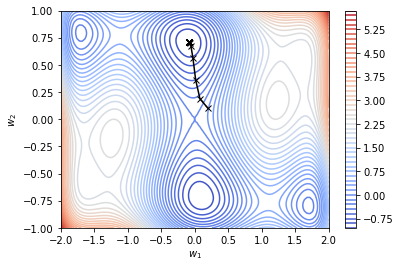

In [7]:
plot_iterations(*iterate(0.2, 0.1, 0.01, 200), skip=10)

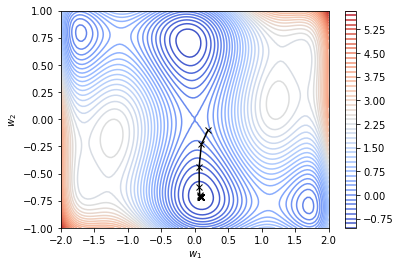

In [8]:
plot_iterations(*iterate(0.2, -0.1, 0.01, 200), skip=10)

## 学習率 $\alpha$ の値が小さいと収束に時間がかかる
逆に $\alpha$ を大きくしすぎると、最小点の周りで振動したり、発散したりする危険がある。

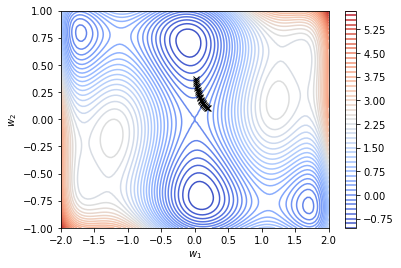

In [9]:
plot_iterations(*iterate(0.2, 0.1, 0.001, 200), skip=10)

## 初期値によっては大域的な最小点ではなく局所的な極小点にたどり着いてしまう

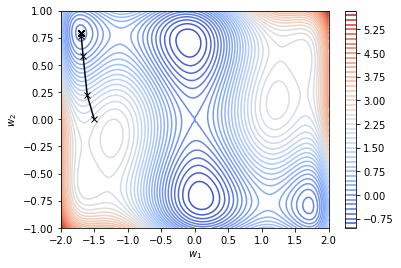

In [10]:
plot_iterations(*iterate(-1.5, 0.0, 0.01, 200), skip=10)